# load imports

In [5]:
%load_ext autoreload

In [6]:
import torch
print(torch.cuda.is_available())


True


In [80]:
import warnings 
def action_with_warnings():
    warnings.warn("ignore")
with warnings.catch_warnings(record=True):    
    from pathlib import Path
    import os
    import pandas as pd
    from tifffile import imread, imwrite
    import glob
    import caiman as cm
    
from datetime import datetime as dt, timedelta
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

from tqdm.auto import tqdm
import numpy as np

import scipy

from PIL import Image
import xml.etree.ElementTree as et
import copy

In [8]:
import sys
sys.version

'3.7.10 | packaged by conda-forge | (default, Sep 13 2021, 19:43:44) \n[GCC 9.4.0]'

In [9]:
%autoreload 
import sys
sys.path.append(r'/home/gromit/anaconda3/envs/kaiman/lib/python3.7/site-packages/caImageAnalysis')
import process, bruker_images, photostimulation
from utilities import arrutils, statutils, coordutils
from fishy import BaseFish, PhotostimFish, VizStimVolume

# setting up variables

In [10]:
#/media/gromit/124d7bfb-0e91-4cf0-8c38-dc3142188881/
#
photostim_data = Path(r'/media/gromit/124d7bfb-0e91-4cf0-8c38-dc3142188881/Binblows-Share/Tyler-Style Sweep/16 March/TSeries-03162024-1620-001')

#photostim_data = Path(r'D:\Imaging_Bruker\20240115_singlecell_stim_habenula\Chrmine_fish2\testing_tyler_params_2-001')



# preprocessing, if a single plane:

In [32]:
if not Path(photostim_data).joinpath('output_folders').exists():
    bruker_images.bruker_img_organization(photostim_data, testkey = 'ome', single_plane = True, pstim_file=False)

In [12]:
fld = Path(photostim_data).joinpath('output_folders/single_plane')



In [ ]:
baseFish = BaseFish(folder_path = fld, frametimes_key = 'frametimes')


In [34]:
process.run_image_rotation(baseFish, angle = 90, crop = 0) #fixing image rotation, needs to happen before movement corr
#caiman
process.run_movement_correction(baseFish, force = True)

baseFish = BaseFish(folder_path = fld, frametimes_key = 'frametimes') # refresh data_paths
#photostimulation.save_badframes_arr(baseFish, no_planes = 1)
#suite2p
#photostimulation.run_caiman_cnmf(baseFish, move_corr = True)


In [ ]:
        with os.scandir(photostim_data) as entries:
            for entry in entries:
                if entry.name.endswith(".tif"):
                    pass

                elif entry.name.endswith(".txt"):
                    pass
                elif entry.name == "frametimes.h5":
                        pass

                elif os.path.isdir(entry.path):
                   pass

                elif entry.name.endswith(".npy"): # these are mislabeled so just flip here
                    pass
                
                # bruker information files
                elif entry.name.endswith("xml"):
                   pass
                elif entry.name.endswith("env"):
                    pass
                elif entry.name.endswith("csv") and 'Voltage' in entry.name:
                    pass
                #this will use Owen custom photostim output from Bruker2pControl in lieu of MarkPoints xml
                elif entry.name.endswith("json") and 'photostim' in entry.name:
                    print("located json")


In [ ]:
%matplotlib


In [21]:
%autoreload
photostimulation.run_suite2p_PS(baseFish, move_corr = True)

<tifffile.TiffFile 'TSeries-0316202…2_000001.ome.tif'> OME series is BinaryOnly, not an OME-TIFF master file 


frametimes counter: 118
badframes found: 1
frametimes counter: 157
badframes found: 2
frametimes counter: 196
badframes found: 3
frametimes counter: 235
badframes found: 4
frametimes counter: 274
badframes found: 5
frametimes counter: 313
badframes found: 6
frametimes counter: 352
badframes found: 7
frametimes counter: 391
badframes found: 8
frametimes counter: 430
badframes found: 9
frametimes counter: 469
badframes found: 10
frametimes counter: 508
badframes found: 11
frametimes counter: 547
badframes found: 12
frametimes counter: 586
badframes found: 13
frametimes counter: 625
badframes found: 14
frametimes counter: 664
badframes found: 15
frametimes counter: 703
badframes found: 16
frametimes counter: 742
badframes found: 17
frametimes counter: 781
badframes found: 18
frametimes counter: 820
badframes found: 19
frametimes counter: 859
badframes found: 20
frametimes counter: 898
badframes found: 21
frametimes counter: 937
badframes found: 22
frametimes counter: 976
badframes found: 

tif
** Found 1 tifs - converting to binary **
2000 frames of binary, time 2.08 sec.
4000 frames of binary, time 3.62 sec.
6000 frames of binary, time 5.16 sec.
8000 frames of binary, time 6.72 sec.
10000 frames of binary, time 8.26 sec.
12000 frames of binary, time 9.81 sec.
time 10.18 sec. Wrote 12295 frames per binary for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
NOTE: Applying builtin classifier at /home/gromit/anaconda3/envs/kaiman/lib/python3.7/site-packages/suite2p/classifiers/classifier.npy
----------- REGISTRATION
Reference frame, 20.71 sec.
Registered 500/12295 in 23.88s
Registered 1000/12295 in 47.68s
Registered 1500/12295 in 71.68s
Registered 2000/12295 in 95.72s
Registered 2500/12295 in 119.79s
Registered 3000/12295 in 143.80s
Registered 3500/12295 in 167.45s
Registered 4000/12295 in 191.10s
Registered 4500/12295 in 214.89s
Registered 5000/12295

making a PhotostimFish object for single plane

In [14]:
%autoreload
oneFish = PhotostimFish(folder_path = fld, 
                        no_planes = 1, 
                        stimmed_planes = [1],
                        rotate = True, 
                        frametimes_key = 'frametimes')

nhello
<DirEntry 'movement_corr_img.tif'>
<DirEntry 'suite2p'>
<DirEntry 'frametimes.h5'>
<DirEntry 'bad_frames.npy'>
<DirEntry 'stim_sites.hdf'>
<DirEntry 'TSeries-03162024-1620-001.xml'>
<DirEntry 'full_duration_per_stim.npy'>
<DirEntry 'original_image'>
<DirEntry 'photostim_info.json'>
located json
<DirEntry 'TSeries-03162024-1620-001_Cycle00001_VoltageRecording_001.csv'>
<DirEntry 'img_rotated.tif'>
<DirEntry 'stim_times.npy'>
<DirEntry 'raw_traces.npy'>
<DirEntry 'TSeries-03162024-1620-001.env'>
rescaled img made


<tifffile.TiffFile 'TSeries-0316202…2_000001.ome.tif'> OME series is BinaryOnly, not an OME-TIFF master file 


# preprocessing, if a volume:

In [ ]:
# run pre-processing if not done already

if not Path(photostim_data).joinpath('output_folders').exists():
    bruker_images.bruker_img_organization(photostim_data, testkey = 'ome', single_plane=False, pstim_file=False)

In [5]:
# to look at all the planes of the volume
paths = {}
with os.scandir(Path(photostim_data).joinpath('output_folders')) as entries:
    for entry in entries:
        if os.path.isdir(entry.path):
            paths[entry.name] = entry.path
number_of_planes = len(paths.keys())

# still pre_processing here:
for p in tqdm(paths.keys()):
    baseFish = BaseFish(folder_path = paths[p], frametimes_key = 'frametimes')
    process.run_image_rotation(baseFish, angle = 90, crop = 0) #fixing image rotation, needs to happen before movement corr
    process.run_movement_correction(baseFish, force = True)
    
    baseFish = BaseFish(folder_path = paths[p], frametimes_key = 'frametimes') # refresh data_paths
    photostimulation.save_badframes_arr(baseFish, no_planes = number_of_planes)
    photostimulation.run_suite2p_PS(baseFish, move_corr = True)

make a fish volume object for the photostim data

In [ ]:
# to gather all the planes of the volume
paths = {}
with os.scandir(Path(photostim_data).joinpath('output_folders')) as entries:
    for entry in entries:
        if os.path.isdir(entry.path):
            paths[entry.name] = entry.path
number_of_planes = len(paths.keys())

In [18]:
# make central vol processing class and identify stim sites, raw traces for stim sites
stimvolume = VizStimVolume()

# identify the planes that were stimulated from the OMR dataset that I have
the_stimmed_planes = photostimulation.identify_stimmed_planes(omr_tseries_path, label)

for p in tqdm(paths.keys()):  
    oneFish = PhotostimFish(folder_path = paths[p], 
                            no_planes = number_of_planes, 
                            stimmed_planes = the_stimmed_planes,
                            rotate = True, 
                            frametimes_key = 'frametimes')
    stimvolume.add_volume(oneFish)  # add them to volume    

# ex 1) plot raw pixel traces for the stimulated sites in a volume

In [17]:
# for plotting only the stimulated sites
all_raw_traces = {}
all_points = {}
for x, y in stimvolume.volumes.items():
    raw_traces, points = photostimulation.collect_raw_traces(y)
    # plotting the ps events
    ps_events = np.load(Path(y.folder_path.joinpath('bad_frames.npy')))
    if x not in all_raw_traces.keys():
        all_raw_traces[x] = raw_traces
        all_points[x] = points

plt.imshow(stimvolume.volumes['plane_2'].ops['refImg'], cmap="gray", alpha=0.85, 
        vmax=np.percentile(stimvolume.volumes['plane_2'].ops['refImg'], 99.9))
for k in all_points.values():
    for l in k:
        plt.scatter(l[0], l[1])
plt.axis('off')
plt.title(f'Stimulation Sites for {label} group')
plt.tight_layout()
plt.show()

cell_list = []
for c in all_raw_traces.values():
    if len(c) != 0: # if not empty array
        norm_c = arrutils.norm_fdff(c)
        for cell in norm_c: # for each cell in c, make a cell array of stim cells
            cell_list.append(cell)

plt.figure(figsize=(12, 8))
for w, x in enumerate(cell_list):
    plt.plot(np.arange(len(x)), arrutils.pretty(x, 5)+ w)
for f in ps_events:
    plt.axvspan(xmin = f-3, xmax = f-2, color = 'red', alpha = 0.4)
plt.yticks([])
plt.ylabel('Normalized Raw Pixel Intensity (F)')
plt.xlabel('Frames')
plt.title(f'Raw pixel traces for stimulation sites in {label} group')
plt.tight_layout()
plt.show()  

# ex 2) finding correlation values between stimulation sites and cells in a volume

In [25]:
stim_traces_lst = []
for v in stimvolume:
    saved_raw_traces = Path(v.folder_path).joinpath('raw_traces.npy') 
    if np.load(saved_raw_traces).shape[0] != 0:
        stim_traces_lst.append(np.load(saved_raw_traces))

stim_traces_array = np.concatenate(stim_traces_lst, axis=0) # grab all raw traces together
sliced_stim_arrays = [x[stimvolume[0].baseline_frames:] for x in stim_traces_array] # only select after baseline time points
arrays = np.vstack(sliced_stim_arrays)

# calculate the correlation values between all 10 of the stimmed neurons
correlation_matrix = np.corrcoef(arrays) 
correlation_matrix[correlation_matrix == 1] = np.nan
 # this will be your divider (normalizing value) in the correlation df
divider = np.nanmean(correlation_matrix)

# running this full array of raw traces through the correlation analysis
for v in stimvolume:
    corr_df, corr_neurons = photostimulation.correlations_with_stim_sites(v, traces_array = stim_traces_array, 
                                                                        normalizing = divider, corr_threshold = 0.5)

# ex 3) plotting the heatmap of each trial of 1 normalized stimulation sites at a time

In [ ]:
big_corr_df_lst = []
raw_traces_arr_lst = []

for v in stimvolume:
    # get the correlation dfs
    corr_df = pd.read_hdf(Path(v.folder_path).joinpath('correlation_df.hdf'))
    corr_df['plane'] = v.data_paths['suite2p'].parents[1].name
    big_corr_df_lst.append(corr_df)

    # get the raw traces of each stimulation site
    raw_traces_arr = np.load(v.folder_path.joinpath('raw_traces.npy')) 
    raw_traces_arr_lst.append(raw_traces_arr)

big_corr_df = pd.concat(big_corr_df_lst)
stim_raw_traces = np.concatenate(raw_traces_arr_lst, axis = 0)
norm_stim_raw_traces = arrutils.norm_0to1(stim_raw_traces)

In [ ]:
offsets = [-7, 25]
frame_subset = arrutils.subsection_arrays(ps_events, offsets) # frame numbers for each event

for x, y in enumerate(norm_stim_raw_traces):
    # iterate through each photostimulation event, then grab the frames before and after each event
    each_trial = np.array([y[s] for s in frame_subset])

    # plot heatmap for each trial
    plt.figure(figsize=(10, 3))
    sns.heatmap(each_trial, cmap = 'viridis', vmin = 0, vmax = 1, xticklabels = 10)
    plt.axvspan(xmin = -offsets[0]-1, xmax = -offsets[0]-1, color = 'red', alpha = 0.8)
    plt.xlabel('Frames')
    plt.ylabel('Stimulation Events')
    plt.title(f'Example stimulation site #{x}')
    plt.show()

    # plot average trace for the cell
    data_mean = np.nanmean(each_trial, axis = 0)
    ci_lower, ci_upper = statutils.calculate_ci(each_trial)
    plt.figure(figsize=(8, 3))
    plt.plot(data_mean, color = 'k')
    plt.fill_between(range(len(data_mean)), ci_lower, ci_upper, color='skyblue', 
                     alpha=0.4, label='95% CI')  # Shade confidence interval
    plt.axvspan(xmin = -offsets[0]-1, xmax = -offsets[0], color = 'red', alpha = 0.4)
    plt.xlabel('Frames')
    plt.ylabel('Normalized Pixel Intensity')
    plt.ylim(0, 0.8)
    plt.title(f'Mean evoked dF/F for stimulation site #{x}')
    plt.show()

# ex 4) plotting single plane stimulation sites and image

In [13]:
oneFish.data_paths['stim_times'] = oneFish.folder_path.joinpath('stim_times.npy')
oneFish.data_paths['stim_durations'] = oneFish.folder_path.joinpath('full_duration_per_stim.npy')

In [14]:
stim_times = np.load(oneFish.data_paths['stim_times'])
stim_durations = np.load(oneFish.data_paths['stim_durations'])

In [56]:
badframes_single = []

for i, frame in enumerate(oneFish.badframes_arr):
    if frame != oneFish.badframes_arr[i-1] + 1:
        badframes_single.append(frame)
    elif i < 450 and frame == oneFish.badframes_arr[i+1] -39:
        badframes_single.append(frame)

In [54]:
badframes_single = [frame for i, frame in enumerate(oneFish.badframes_arr) if frame != oneFish.badframes_arr[i-1] + 1 or frame == oneFish.badframes_arr[i+1] - 39 ]  

IndexError: index 486 is out of bounds for axis 0 with size 486

In [58]:
len(badframes_single)

294

In [20]:
len(badframes_single)

292

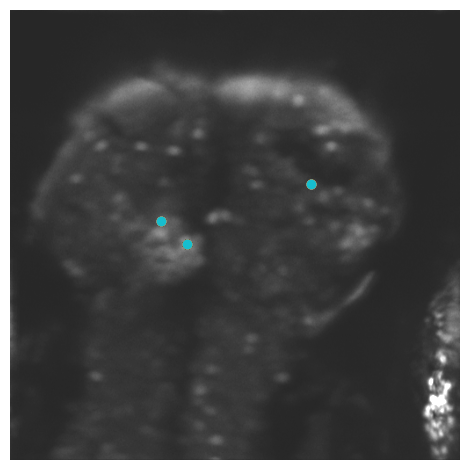

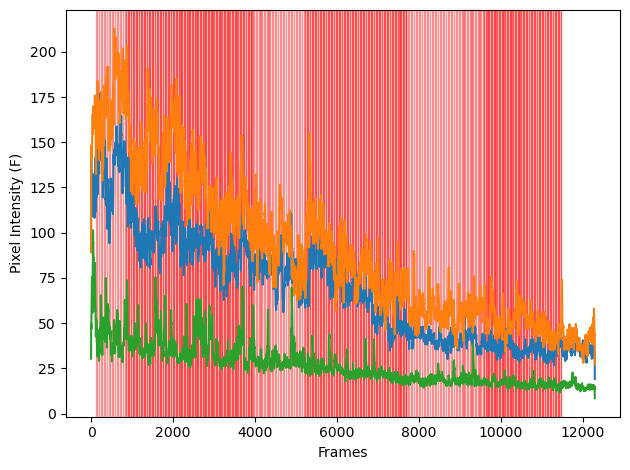

In [71]:
# plotting the locations
img = oneFish.ops["refImg"]
ps_events = oneFish.badframes_arr

plt.imshow(img, cmap="gray", alpha=0.85, vmax=np.percentile(img, 99.9))
for point in zip(oneFish.stim_sites_df.x_stim, oneFish.stim_sites_df.y_stim):
    plt.scatter(point[0], point[1])
plt.axis('off')
plt.tight_layout()
plt.show()

# plotting the raw traces with the baselines
for b, c in enumerate(oneFish.raw_traces[0,:]):
    plt.plot(np.arange(len(oneFish.raw_traces[b])), arrutils.pretty(c, 5))
for f in ps_events:
    plt.axvspan(xmin = f-3, xmax = f-2, color = 'red', alpha = 0.4)
plt.xlabel('Frames')
plt.ylabel('Pixel Intensity (F)')

plt.tight_layout()
plt.show()



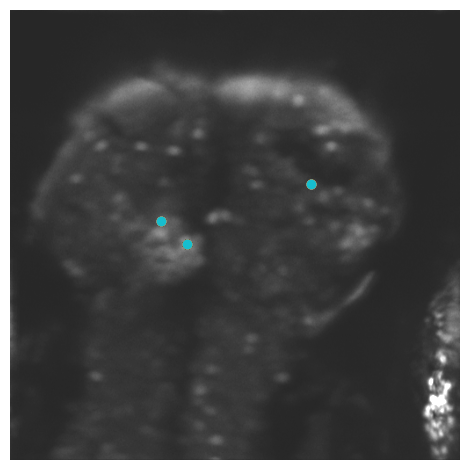

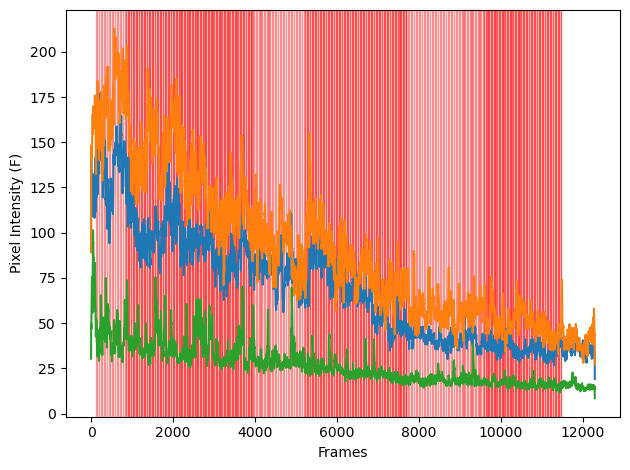

In [71]:
# plotting the locations
img = oneFish.ops["refImg"]
ps_events = oneFish.badframes_arr

plt.imshow(img, cmap="gray", alpha=0.85, vmax=np.percentile(img, 99.9))
for point in zip(oneFish.stim_sites_df.x_stim, oneFish.stim_sites_df.y_stim):
    plt.scatter(point[0], point[1])
plt.axis('off')
plt.tight_layout()
plt.show()

# plotting the raw traces with the baselines
for b, c in enumerate(oneFish.raw_traces[1,:]):
    plt.plot(np.arange(len(oneFish.raw_traces[b])), arrutils.pretty(c, 5))
for f in ps_events:
    
    plt.axvspan(xmin = f-3, xmax = f-2, color = 'red', alpha = 0.4)
plt.xlabel('Frames')
plt.ylabel('Pixel Intensity (F)')

plt.tight_layout()
plt.show()



(171.00000000000003, 240.0)


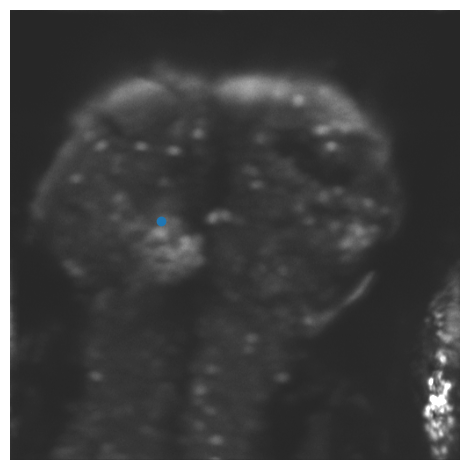

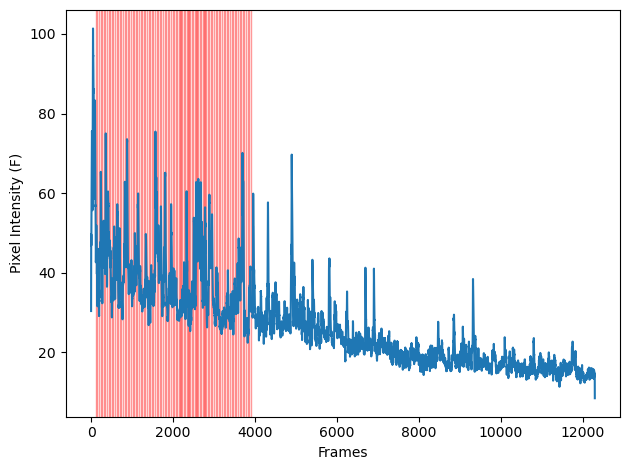

In [96]:
# plotting the locations
img = oneFish.ops["refImg"]
ps_events = oneFish.badframes_arr

plt.imshow(img, cmap="gray", alpha=0.85, vmax=np.percentile(img, 99.9))
point = (oneFish.stim_sites_df.x_stim[2], oneFish.stim_sites_df.y_stim[2])
plt.scatter(point[0], point[1])
print(point)
plt.axis('off')
plt.tight_layout()
plt.show()

# plotting the raw traces with the baselines
plt.plot(np.arange(len(oneFish.raw_traces[2])), arrutils.pretty(oneFish.raw_traces[2], 5))
for i, f in enumerate(badframes_single):
    if(f<3903):#(f>=7688):
        plt.axvspan(xmin = f-3, xmax = f-2, color = 'red', alpha = 0.4)
plt.xlabel('Frames')
plt.ylabel('Pixel Intensity (F)')

plt.tight_layout()
plt.show()



In [95]:
np.shape(np.where(np.array(badframes_single) < 3903))

(1, 98)

In [ ]:
oneFish.

In [72]:
np.shape(oneFish.raw_traces)

(3, 12295)

In [ ]:
# plotting the averaged raw traces per stimulation
duration_in_frames = 1
pre = 10
post = 30
len_array = pre + post + duration_in_frames
array_per_trial = np.full((len(ps_events), len_array), np.nan)

for q, p in enumerate(ps_events):
    nested_trace = oneFish.raw_traces[:, p - pre : p + duration_in_frames + post]
    trace = [item for sublist in nested_trace for item in sublist]
    baseline_mean = np.nanmean(trace[5:pre])
    if p == ps_events[-1]:
        array_per_trial[q, :len(trace)] = trace/baseline_mean
    else:
        array_per_trial[q] = trace/baseline_mean

mean_trace = np.nanmedian(array_per_trial, axis=0)
std_trace = np.nanstd(array_per_trial, axis=0)
for a in array_per_trial:
    plt.plot(arrutils.pretty(a, 3))
plt.plot(mean_trace, color='k', linewidth=3)
plt.axvspan(xmin = pre, xmax = pre + duration_in_frames, color = 'red', alpha = 0.4)
plt.xlim(3, 38)
# plt.ylim(35, 75)
current_ticks = plt.xticks()[0]
current_labels = [float(label) for label in current_ticks]
new_labels = [int(c/oneFish.hzReturner(oneFish.frametimes_df)) for c in current_labels]
plt.xticks(current_ticks, new_labels)

plt.title('14 Trials, Single Cell Stim (black trace = median)')
plt.xlabel('Time(s)')
plt.ylabel('Normalized Pixel Intensity (dF/F)')

plt.tight_layout()
plt.show()

In [19]:
badframes_single = []
for i, frame in enumerate(oneFish.badframes_arr):
    if(frame != oneFish.badframes_arr[i-1] +1 or (i<400 and frame==oneFish.badframes_arr[i+1]-39)):
        badframes_single.append(frame)

In [22]:
len(badframes_single)

294

In [2]:
def strided_app(a, L, S ):  # Window len = L, Stride len/stepsize = S
    nrows = ((a.size-L)//S)+1
    n = a.strides[0]
    return np.lib.stride_tricks.as_strided(a, shape=(nrows,L), strides=(S*n,n))

9296
12295
98
9296
12295
98
9296
12295
98


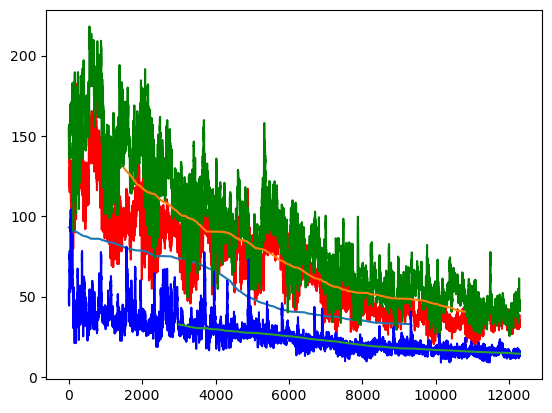

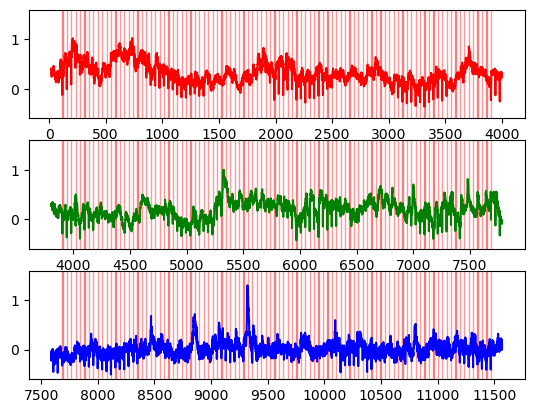

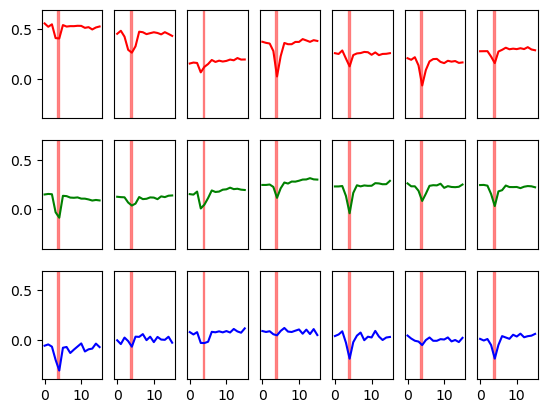

In [96]:
starts = [0, 3903, 7688]
starts2 = [0, 1499, 2999]
stops = [3903, 7688, 11591]
colors = ['r', 'g', 'b']


pre = 5
post = 10
assumed_duration = 1

moving_quantile_length = 3000
baseline_percentile = 20

repetitions = 14
param_vals = 7


_, tracesBaselines = plt.subplots()
_, dfTraces = plt.subplots(3)


fig, ax = plt.subplots(3,param_vals)

for i in range(3):
    
    #SELECT THE FRAMES AND BADFRAMES FOR THIS CELL
    frames_selection = np.array(oneFish.raw_traces[i])
    badframes_selection = [f for f in badframes_single if f>= starts[i] and f <stops[i]]
    
    #CALCULATE A MOVING QUANTILE BASELINE
    stepped_selection = strided_app(frames_selection, moving_quantile_length, 1)
    moving_baseline = np.percentile(stepped_selection, baseline_percentile, axis=1)
    
    
    #PLOT BASELINE ALONG WITH ROI TRACE
    tracesBaselines.plot(np.arange(len(frames_selection)), frames_selection, color=colors[i])
    tracesBaselines.plot(np.arange(len(moving_baseline))+starts2[i], moving_baseline)

    #PLOT DF TRACES
    dfTruncated = np.array(frames_selection[starts2[i]:starts2[i]+len(moving_baseline)])
    
    print(len(dfTruncated))
    dfTruncated = (dfTruncated-moving_baseline)/moving_baseline
    dfTruncated = np.hstack((np.zeros(starts2[i]), dfTruncated))
    #select just stimulated window and add 100 frames on either end
    dfFull = copy.deepcopy(dfTruncated)
    dfTruncated = dfTruncated[badframes_selection[0]-100:badframes_selection[-1]+100]
    dfTraces[i].set_ylim([-0.6,1.6])
    dfTraces[i].plot(np.arange(badframes_selection[0]-100,badframes_selection[-1]+100), dfTruncated, color=colors[i])
    for badframe in badframes_selection:
        dfTraces[i].axvspan(xmin = badframe-1, xmax = badframe+1, color = 'red', alpha = 0.4)

    #GENERATE PERISTIMULUS DF PLOTS
    periStimuli = np.zeros((len(badframes_selection), pre+post+assumed_duration))
    
    for stimIndex, badframe in enumerate(badframes_selection):
        periStimuli[stimIndex, :] = dfFull[badframe-pre:badframe+post+assumed_duration]
    #reshape the peristimuli    
    periStimuli = np.reshape(periStimuli, (param_vals, repetitions, -1), order='c')
    periStimuli = np.mean(periStimuli, axis=1)
    for paramVal in range(param_vals):
        
        if(i != 2):
            ax[i][paramVal].get_xaxis().set_visible(False)

        if(paramVal !=0):
            ax[i][paramVal].get_yaxis().set_visible(False)

        ax[i][paramVal].set_ylim([-0.4,0.7])
        ax[i][paramVal].plot(periStimuli[paramVal], color=colors[i])
        ax[i][paramVal].axvspan(xmin = pre-1.5, xmax = pre-1, color = 'red', alpha = 0.4)
    
    
    print(len(frames_selection))
    print(len(badframes_selection))
    
    
    

In [48]:
type(dfTruncated)

NameError: name 'dfTruncated' is not defined

In [26]:
badframes_single

[118,
 157,
 196,
 235,
 274,
 313,
 352,
 391,
 430,
 469,
 508,
 547,
 586,
 625,
 664,
 703,
 742,
 781,
 820,
 859,
 898,
 937,
 976,
 1015,
 1054,
 1093,
 1132,
 1171,
 1210,
 1249,
 1288,
 1327,
 1366,
 1405,
 1444,
 1483,
 1522,
 1561,
 1600,
 1639,
 1678,
 1717,
 1756,
 1795,
 1834,
 1873,
 1912,
 1951,
 1990,
 2029,
 2068,
 2107,
 2146,
 2185,
 2224,
 2263,
 2302,
 2341,
 2380,
 2419,
 2458,
 2497,
 2536,
 2575,
 2614,
 2653,
 2692,
 2731,
 2770,
 2809,
 2848,
 2887,
 2926,
 2965,
 3004,
 3043,
 3082,
 3121,
 3160,
 3199,
 3238,
 3277,
 3316,
 3355,
 3394,
 3433,
 3472,
 3511,
 3550,
 3589,
 3628,
 3667,
 3706,
 3745,
 3784,
 3823,
 3862,
 3901,
 3903,
 3942,
 3981,
 4020,
 4059,
 4098,
 4137,
 4176,
 4215,
 4254,
 4293,
 4332,
 4371,
 4410,
 4449,
 4488,
 4527,
 4566,
 4605,
 4644,
 4683,
 4722,
 4761,
 4800,
 4839,
 4878,
 4917,
 4956,
 4995,
 5034,
 5073,
 5112,
 5151,
 5190,
 5229,
 5268,
 5307,
 5346,
 5385,
 5424,
 5463,
 5502,
 5541,
 5580,
 5619,
 5658,
 5697,
 5736,
 

In [24]:
aaa = mystr.split('\n')

In [25]:
aaa

['',
 'frametimes counter: 118',
 'badframes found: 1',
 'frametimes counter: 157',
 'badframes found: 2',
 'frametimes counter: 196',
 'badframes found: 3',
 'frametimes counter: 235',
 'badframes found: 4',
 'frametimes counter: 274',
 'badframes found: 5',
 'frametimes counter: 313',
 'badframes found: 6',
 'frametimes counter: 352',
 'badframes found: 7',
 'frametimes counter: 391',
 'badframes found: 8',
 'frametimes counter: 430',
 'badframes found: 9',
 'frametimes counter: 469',
 'badframes found: 10',
 'frametimes counter: 508',
 'badframes found: 11',
 'frametimes counter: 547',
 'badframes found: 12',
 'frametimes counter: 586',
 'badframes found: 13',
 'frametimes counter: 625',
 'badframes found: 14',
 'frametimes counter: 664',
 'badframes found: 15',
 'frametimes counter: 703',
 'badframes found: 16',
 'frametimes counter: 742',
 'badframes found: 17',
 'frametimes counter: 781',
 'badframes found: 18',
 'frametimes counter: 820',
 'badframes found: 19',
 'frametimes cou

In [47]:
oneFish.badframes_arr

array([  118,   157,   196,   235,   274,   313,   352,   391,   430,
         469,   508,   547,   586,   625,   664,   703,   742,   781,
         820,   859,   860,   898,   899,   937,   938,   976,   977,
        1015,  1016,  1054,  1055,  1093,  1094,  1132,  1133,  1171,
        1172,  1210,  1211,  1249,  1250,  1288,  1289,  1327,  1328,
        1366,  1367,  1405,  1406,  1444,  1445,  1483,  1484,  1522,
        1523,  1561,  1562,  1600,  1601,  1639,  1640,  1678,  1679,
        1717,  1718,  1756,  1757,  1795,  1796,  1834,  1835,  1873,
        1874,  1912,  1913,  1951,  1952,  1990,  1991,  2029,  2030,
        2068,  2069,  2107,  2108,  2146,  2147,  2185,  2186,  2224,
        2225,  2263,  2264,  2302,  2303,  2341,  2342,  2380,  2381,
        2419,  2420,  2458,  2459,  2497,  2498,  2536,  2537,  2575,
        2576,  2614,  2615,  2653,  2654,  2692,  2693,  2731,  2732,
        2770,  2771,  2809,  2810,  2848,  2849,  2887,  2888,  2926,
        2927,  2965,

In [26]:
bbb = [item for item in aaa if not 'badframes' in item]

In [30]:
ccc =  [item[20:] for item in bbb[1:-3]]

In [37]:
ddd = np.array(ccc, dtype=int)

In [38]:
eee = np.array(badframes_single)

In [39]:
ddd

array([  118,   157,   196,   235,   274,   313,   352,   391,   430,
         469,   508,   547,   586,   625,   664,   703,   742,   781,
         820,   859,   898,   937,   976,  1015,  1054,  1093,  1132,
        1171,  1210,  1249,  1288,  1327,  1366,  1405,  1444,  1483,
        1522,  1561,  1600,  1639,  1678,  1717,  1756,  1795,  1834,
        1873,  1912,  1951,  1990,  2029,  2068,  2107,  2146,  2185,
        2224,  2263,  2302,  2341,  2380,  2419,  2458,  2497,  2536,
        2575,  2614,  2653,  2692,  2731,  2770,  2809,  2848,  2887,
        2926,  2965,  3004,  3043,  3082,  3121,  3160,  3199,  3238,
        3277,  3316,  3355,  3394,  3433,  3472,  3511,  3550,  3589,
        3628,  3667,  3706,  3745,  3784,  3823,  3862,  3901,  3903,
        3942,  3981,  4020,  4059,  4098,  4137,  4176,  4215,  4254,
        4293,  4332,  4371,  4410,  4449,  4488,  4527,  4566,  4605,
        4644,  4683,  4722,  4761,  4800,  4839,  4878,  4917,  4956,
        4995,  5034,

In [35]:
eee

array([  118,   157,   196,   235,   274,   313,   352,   391,   430,
         469,   508,   547,   586,   625,   664,   703,   742,   781,
         820,   859,   898,   937,   976,  1015,  1054,  1093,  1132,
        1171,  1210,  1249,  1288,  1327,  1366,  1405,  1444,  1483,
        1522,  1561,  1600,  1639,  1678,  1717,  1756,  1795,  1834,
        1873,  1912,  1951,  1990,  2029,  2068,  2107,  2146,  2185,
        2224,  2263,  2302,  2341,  2380,  2419,  2458,  2497,  2536,
        2575,  2614,  2653,  2692,  2731,  2770,  2809,  2848,  2887,
        2926,  2965,  3004,  3043,  3082,  3121,  3160,  3199,  3238,
        3277,  3316,  3355,  3394,  3433,  3472,  3511,  3550,  3589,
        3628,  3667,  3706,  3745,  3784,  3823,  3862,  3901,  3942,
        3981,  4020,  4059,  4098,  4137,  4176,  4215,  4254,  4293,
        4332,  4371,  4410,  4449,  4488,  4527,  4566,  4605,  4644,
        4683,  4722,  4761,  4800,  4839,  4878,  4917,  4956,  4995,
        5034,  5073,

In [42]:
ddd

array([  118,   157,   196,   235,   274,   313,   352,   391,   430,
         469,   508,   547,   586,   625,   664,   703,   742,   781,
         820,   859,   898,   937,   976,  1015,  1054,  1093,  1132,
        1171,  1210,  1249,  1288,  1327,  1366,  1405,  1444,  1483,
        1522,  1561,  1600,  1639,  1678,  1717,  1756,  1795,  1834,
        1873,  1912,  1951,  1990,  2029,  2068,  2107,  2146,  2185,
        2224,  2263,  2302,  2341,  2380,  2419,  2458,  2497,  2536,
        2575,  2614,  2653,  2692,  2731,  2770,  2809,  2848,  2887,
        2926,  2965,  3004,  3043,  3082,  3121,  3160,  3199,  3238,
        3277,  3316,  3355,  3394,  3433,  3472,  3511,  3550,  3589,
        3628,  3667,  3706,  3745,  3784,  3823,  3862,  3901,  3903,
        3942,  3981,  4020,  4059,  4098,  4137,  4176,  4215,  4254,
        4293,  4332,  4371,  4410,  4449,  4488,  4527,  4566,  4605,
        4644,  4683,  4722,  4761,  4800,  4839,  4878,  4917,  4956,
        4995,  5034,

In [40]:
fff = [item for i, item in enumerate(ddd) if item != ddd[i-1] + 39]

In [41]:
fff

[118, 3903, 7688]

In [45]:
np.where(ddd == 3903)

(array([98]),)

In [65]:
mm = pd.read_hdf(Path(oneFish.folder_path).joinpath("stim_sites.hdf"))

In [66]:
mm

,plane,x_stim,y_stim,sp_size
0,0,171.0,240.0,4.699217
1,0,171.0,240.0,4.699217
2,0,171.0,240.0,4.699217
3,0,171.0,240.0,4.699217
4,0,171.0,240.0,4.699217
...,...,...,...,...
1465,0,342.0,198.0,4.699217
1466,0,342.0,198.0,4.699217
1467,0,342.0,198.0,4.699217
1468,0,342.0,198.0,4.699217
